# Monte carlo simulation

In [1]:
import numpy as np
import polars as pl
from polars import col
import matplotlib.pyplot as plt
import seaborn as sb

%load_ext autoreload
%autoreload 2
plt.style.use("../matplotlibrc")

In [2]:
from findec.returns import draw_lognormal_return
from findec.utility import composite_crra_utility

In [3]:
from findec.dataclasses import Preferences

preferences = Preferences()

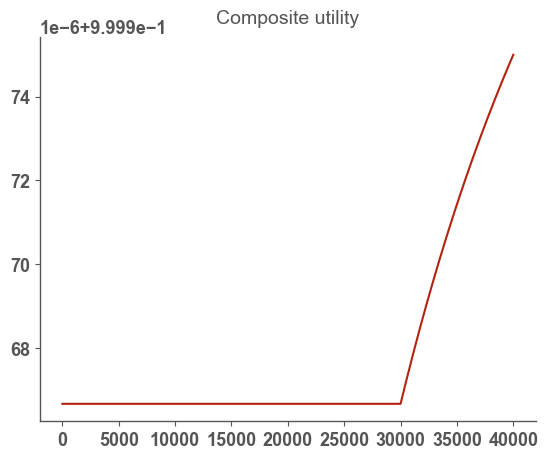

In [4]:
w = np.linspace(0, 40e3, 1000)
u = np.array([composite_crra_utility(wi, pref=preferences) for wi in w])
fig, ax = plt.subplots()
ax.plot(w, u)
ax.set_title("Composite utility");

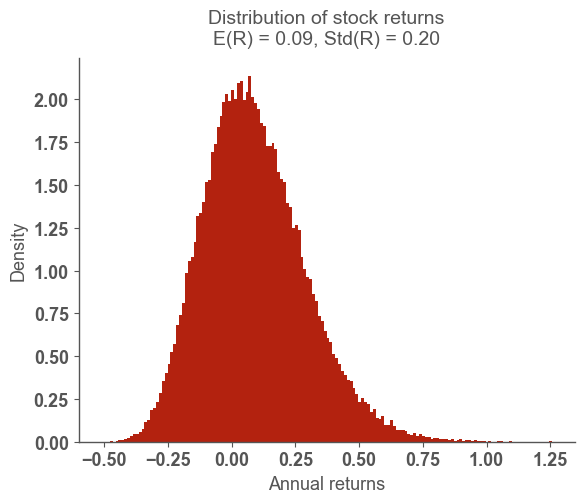

In [5]:
stock_returns = draw_lognormal_return(mean_return=0.09, stdev=0.2, n_sims=100_000)
fig, ax = plt.subplots()
ax.hist(stock_returns, bins="auto", density=True)
stock_returns_mean = stock_returns.mean()
stock_returns_std = stock_returns.std()
ax.set_xlabel("Annual returns")
ax.set_ylabel("Density")
ax.set_title(
    f"Distribution of stock returns\nE(R) = {stock_returns_mean:.2f}, Std(R) = {stock_returns_std:.2f}"
);

In [6]:
from findec.simulate import simulate_life_paths, simulate_life_path
from findec.dataclasses import Assets

In [7]:
initial_assets = Assets(tax_free=400_000.0, taxable=600_000.0, tax_rate=0.2)
preferences = Preferences(bequest_param=10)

sims = simulate_life_paths(
    n_sims=10,
    expected_return_risky=0.09,
    std_dev_return_risky=0.20,
    risk_free_rate=0.04,
    pref=preferences,
    a=initial_assets,
    social_security=30_000.0,
    time_horizon=20,
    starting_age=65,
    is_male=False,
    rng_seed_offset=42,
    with_survival_probabilities=False,
)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 302.07it/s]


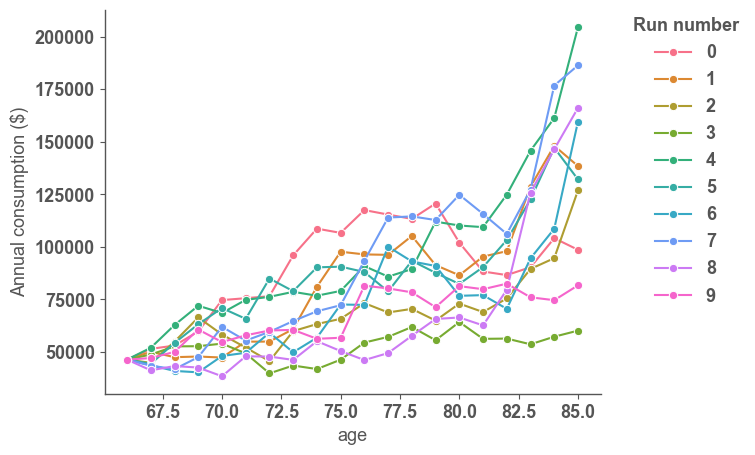

In [8]:
ax = sb.lineplot(sims, x="age", y="consumption", hue="run_number", marker="o")
plt.legend(
    bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title="Run number"
)
ax.set_ylabel("Annual consumption ($)");

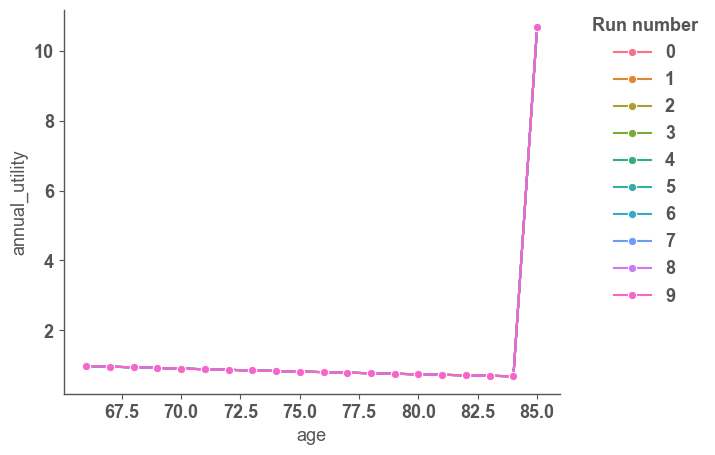

In [9]:
ax = sb.lineplot(sims, x="age", y="annual_utility", hue="run_number", marker="o")
plt.legend(
    bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title="Run number"
);

Text(0, 0.5, 'Bequest ($)')

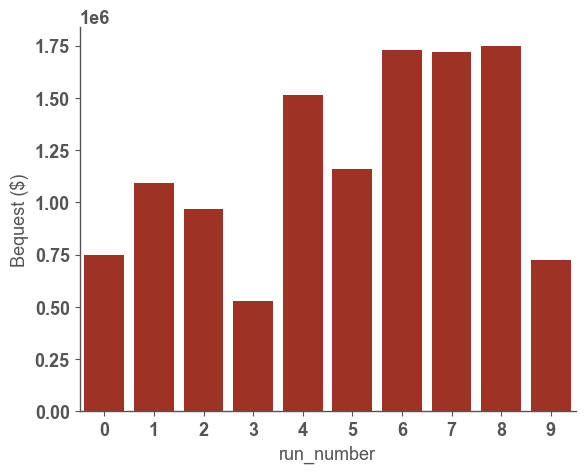

In [10]:
ax = sb.barplot(
    sims.sort("age")
    .group_by("run_number")
    .agg(col("bequest").last())
    .sort("run_number"),
    x="run_number",
    y="bequest",
)
ax.set_ylabel("Bequest ($)")